In [1]:
# Imports
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=0.2, random_state=29)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


2. Basic Data Visualization

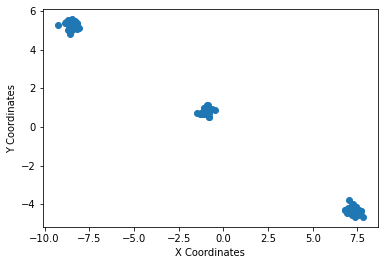

In [2]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

3. Using scikit-learn to perform K-Means clustering

In [3]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=7).fit(X)

4. Visualize and evaluate the results

In [4]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[ 7.28724828, -4.31084417],
       [-0.95268779,  0.82353534],
       [-8.51138322,  5.28376712]])

In [5]:
# Get the cluster labels
kmeans.labels_

array([0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 0,
       0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1], dtype=int32)

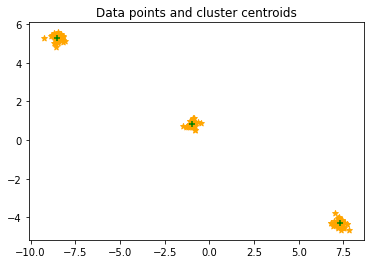

In [6]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1], c='orange', marker='*')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='green', marker='+')
plt.title('Data points and cluster centroids')
plt.show()

In [7]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.9614023564869868


6. Determining the value of K using silhouette_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


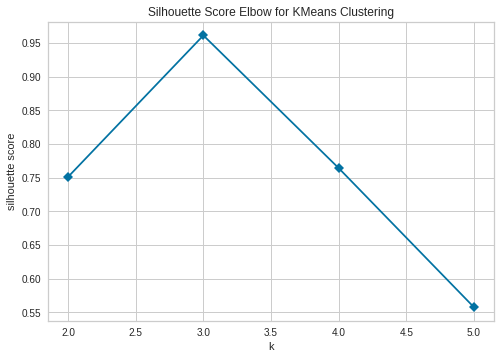

In [8]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=7)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)

# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()